**Q1. Theory and Concepts:**

1.  Explain the concept of batch normalization in the context of Artificial Neural Networks.

2.  Describe the benefits of using batch normalization during training.

3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Solution :

**1. Batch Normalization** : 

* In Artificial Neural Networks (ANNs), Batch Normalization (BN) is a crucial technique designed to alleviate the issues related to     internal covariate shift. Internal covariate shift refers to the phenomenon where the distribution of input values to each layer changes during training, which can hinder convergence. BN combats this by normalizing the inputs of each layer.

* This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.
    

**2. Benefits:**

* Firstly, it accelerates convergence by reducing the vanishing or exploding gradient problem, which can occur when dealing with deep networks. By stabilizing the distribution of inputs to each layer, BN ensures that gradients flow smoothly during backpropagation, facilitating more efficient learning. 

* Secondly, BN acts as a form of regularization by adding noise to the activations within each mini-batch, which can help prevent overfitting. 

* Moreover, BN reduces the dependency of the model on the initialization of weights, allowing for more robust training across different architectures and initialization schemes.

**3. Working Principle:**

Batch Normalization is a technique used to standardize the inputs to a layer for each mini-batch, which helps to stabilize the learning process and reduce the number of training epochs required to train deep networks.

The working principle of Batch Normalization involves two main steps:

1. **Normalization Step**: The first step is to normalize the inputs (activations) to a layer for each mini-batch. This involves computing the mean and variance for the data in the mini-batch, and then using these statistics to normalize the data. The normalization process is as follows:

    - Compute the mean $\mu_B$ and variance $\sigma_B^2$ for the data in the mini-batch $B = \{x_1, x_2, ..., x_m\}$:

        $$\mu_B = \frac{1}{m}\sum_{i=1}^{m}x_i$$
        $$\sigma_B^2 = \frac{1}{m}\sum_{i=1}^{m}(x_i - \mu_B)^2$$

    - Normalize the data using the computed mean and variance:

        $$\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$

    where $\epsilon$ is a small constant added for numerical stability.

2. **Learnable Parameters**: The second step involves introducing two learnable parameters that scale and shift the normalized data. This is done to ensure that the normalization process does not limit the representational power of the network. The scaling and shifting process is as follows:

    $$y_i = \gamma\hat{x}_i + \beta$$

    where $\gamma$ and $\beta$ are learnable parameters of the same shape as $x_i$, initialized as $\gamma = 1$ and $\beta = 0$. These parameters are learned during the backpropagation process.

During inference (or testing), the batch normalization layer uses a running average of these means and variances (computed during training) to normalize the new incoming data. This is why the network continues to work even after it's been trained and is being evaluated on new data. 

In summary, Batch Normalization helps to make the network more robust to different initialization strategies, makes gradient flow better in the network, and reduces the dependency on the learning rate. It also speeds up the training process and enables the training of deeper networks.

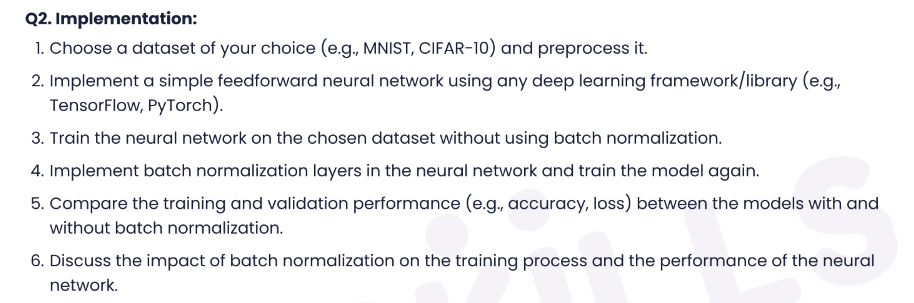

**Solution:**

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')

# About Dataset 

The CIFAR-10 dataset is a popular benchmark dataset in the field of computer vision and machine learning. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes are mutually exclusive and include common objects such as airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

* Image Size: Each image in the CIFAR-10 dataset is 32x32 pixels in size, which is relatively small compared to many other datasets. This makes it suitable for quick experimentation and training on modest hardware.

* Color Images: CIFAR-10 contains color images, meaning each pixel in the image is represented by three values corresponding to the intensity of the red, green, and blue (RGB) channels.

In [3]:
cifar10 =  tf.keras.datasets.cifar10   # cifar10 dataset

In [4]:
cifar10

<module 'keras.datasets.cifar10' from '/opt/conda/lib/python3.10/site-packages/keras/datasets/cifar10/__init__.py'>

In [5]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

**Training and Test Sets:**
The CIFAR-10 dataset is split into a training set with 50,000 images and a test set with 10,000 images. This standard split allows researchers to train models on a large portion of the data and evaluate their performance on unseen data.

In [6]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train[0].shape

(32, 32, 3)

In [10]:
X_train= X_train.astype('float32')/255
X_test= X_test.astype('float32')/255

In [11]:
len(X_train[5000:])

45000

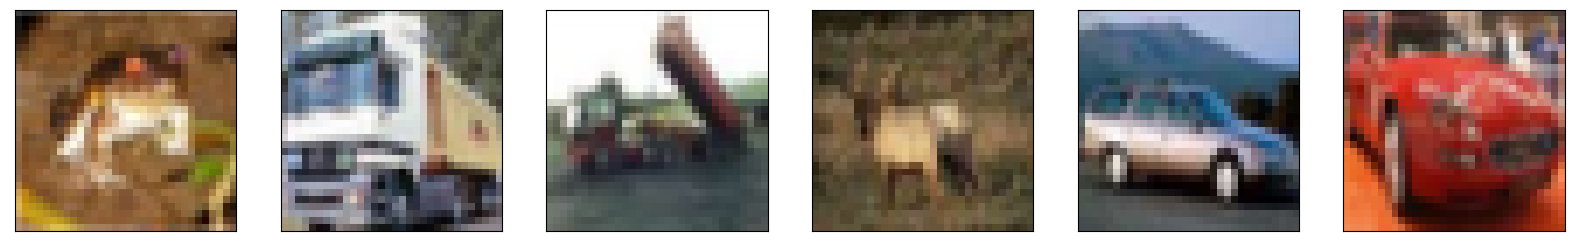

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# plot first six training images
fig= plt.figure(figsize=(20,20))
for i in range(6):
    ax= fig.add_subplot(1, 6 , i+1 , xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')


# Without BatchNormalization 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization

# build the model object
model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation= 'relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(50, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       409,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,652 (1.66 MB)

 Trainable params: 434,652 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

# TENSORBOARD CALLBACK

In [13]:
#logging
log_folder = 'logs'
%load_ext tensorboard
# !rm -rf logs
!rm -rf logs
tb_cb = tf.keras.callbacks.TensorBoard(log_dir = log_folder , histogram_freq = 1)

## Early Stopping Callback

In [14]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor= "val_loss",patience= 5 , min_delta=0.01)

## MODEL CHECKPOINT CALLBACK

In [20]:
CKPT_path = "cifar_10.keras"
check_point_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True ,verbose=1)

In [21]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use : tf.losses.spare_categotical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss = LOSS_FUNCTION , 
                 optimizer = OPTIMIZER,
                 metrics = METRICS)

In [22]:
# training
EPOCHS = 10
VALIDATION_SET = (X_test , y_test)
history = model.fit(X_train,y_train ,epochs = EPOCHS ,validation_data=VALIDATION_SET ,
                        batch_size=32 , callbacks= [tb_cb, early_stopping_cb, check_point_cb], verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.75791, saving model to cifar_10.keras
1563/1563 - 20s - 13ms/step - accuracy: 0.3014 - loss: 1.9422 - val_accuracy: 0.3711 - val_loss: 1.7579
Epoch 2/10

Epoch 2: val_loss improved from 1.75791 to 1.49212, saving model to cifar_10.keras
1563/1563 - 18s - 11ms/step - accuracy: 0.4469 - loss: 1.5462 - val_accuracy: 0.4625 - val_loss: 1.4921
Epoch 3/10

Epoch 3: val_loss did not improve from 1.49212
1563/1563 - 18s - 11ms/step - accuracy: 0.5094 - loss: 1.3722 - val_accuracy: 0.4496 - val_loss: 1.5892
Epoch 4/10

Epoch 4: val_loss improved from 1.49212 to 1.22649, saving model to cifar_10.keras
1563/1563 - 18s - 11ms/step - accuracy: 0.5541 - loss: 1.2599 - val_accuracy: 0.5621 - val_loss: 1.2265
Epoch 5/10

Epoch 5: val_loss improved from 1.22649 to 1.20359, saving model to cifar_10.keras
1563/1563 - 18s - 11ms/step - accuracy: 0.5883 - loss: 1.1629 - val_accuracy: 0.5673 - val_loss: 1.2036
Epoch 6/10

Epoch 6: val_loss did not improve

In [15]:
# With Batch Normalization 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization

# build the model object
model_2= Sequential()

model_2.add(Conv2D(32, kernel_size=(3,3), padding='same', activation= 'relu', input_shape=(32,32,3)))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation= 'relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Flatten())

model_2.add(Dense(100, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(50, activation= 'relu'))
model_2.add(Dense(10, activation= 'softmax'))

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       409,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,052 (1.66 MB)

 Trainable params: 434,852 (1.66 MB)

 Non-trainable params: 200 (800.00 B)

# Model CheckPoint Callback

In [16]:
CKPT_path = "cifar_10_2.keras"
check_point_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True ,verbose=1)

In [17]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use : tf.losses.spare_categotical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate => tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_2.compile(loss = LOSS_FUNCTION , 
                 optimizer = OPTIMIZER,
                 metrics = METRICS)

In [ ]:
# training
EPOCHS = 10
VALIDATION_SET = (X_test , y_test)
history = model_2.fit(X_train,y_train ,epochs = EPOCHS ,validation_data=VALIDATION_SET ,
                        batch_size=64 , callbacks= [tb_cb, early_stopping_cb, check_point_cb], verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.58736, saving model to cifar_10_2.keras
782/782 - 15s - 19ms/step - accuracy: 0.4224 - loss: 1.6490 - val_accuracy: 0.4326 - val_loss: 1.5874
Epoch 2/10

Epoch 2: val_loss improved from 1.58736 to 1.35082, saving model to cifar_10_2.keras
782/782 - 13s - 16ms/step - accuracy: 0.5482 - loss: 1.2826 - val_accuracy: 0.5123 - val_loss: 1.3508
Epoch 3/10

Epoch 3: val_loss improved from 1.35082 to 1.21436, saving model to cifar_10_2.keras
782/782 - 13s - 17ms/step - accuracy: 0.6009 - loss: 1.1311 - val_accuracy: 0.5633 - val_loss: 1.2144
Epoch 4/10

Epoch 4: val_loss did not improve from 1.21436
782/782 - 13s - 16ms/step - accuracy: 0.6385 - loss: 1.0284 - val_accuracy: 0.3467 - val_loss: 2.4530
Epoch 5/10

Epoch 5: val_loss did not improve from 1.21436
782/782 - 13s - 16ms/step - accuracy: 0.6643 - loss: 0.9526 - val_accuracy: 0.5454 - val_loss: 1.3109
Epoch 6/10

Epoch 6: val_loss improved from 1.21436 to 1.07022, saving model to cifar

# ANALYSIS: 

## whithout Batch Normalization: Accuracy= 70%
## with Batch Normalization: Accuracy = 76%

# Batch Size Analysis: 

* With Batch size= 32, accuracy = 76% 

* With Batch size= 64, accuracy= Around 75% 

Q3. Experimentation and Analysis
1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
2.  Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

Solution :

1. See above

2. 

**Advantages:**


* Firstly, it accelerates convergence by reducing the vanishing or exploding gradient problem, which can occur when dealing with deep networks. By stabilizing the distribution of inputs to each layer, BN ensures that gradients flow smoothly during backpropagation, facilitating more efficient learning. 

* Secondly, BN acts as a form of regularization by adding noise to the activations within each mini-batch, which can help prevent overfitting. 

* Moreover, BN reduces the dependency of the model on the initialization of weights, allowing for more robust training across different architectures and initialization schemes.

**Limitations**: